In [198]:
import pandas as pd  
df = pd.read_csv('User0_credit_card_transactions.csv')
df.head(10)
print(df.shape)
print(df.columns)
print(df.isnull().sum())

(19963, 15)
Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')
User                  0
Card                  0
Year                  0
Month                 0
Day                   0
Time                  0
Amount                0
Use Chip              0
Merchant Name         0
Merchant City         0
Merchant State     1317
Zip                1647
MCC                   0
Errors?           19389
Is Fraud?             0
dtype: int64


In [199]:
df.dropna(subset=['Merchant State', 'Zip'], inplace=True)
print(df.shape)
df.isnull().sum()
df.drop(columns="Errors?", inplace=True,errors='ignore')
df.isnull().sum()
print(df.shape)
# df


(18316, 15)
(18316, 14)


In [200]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,0,4,2009,2,7,16:16,$22.70,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,No
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,-8129520121141002186,La Verne,CA,91750.0,5211,No
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5474320255037684877,Hawthorne,CA,90250.0,5912,No


In [201]:
df.shape

(18316, 14)

In [202]:
print("\nInfo:\n\n")
print(df.info())
print("\n\nDescription:\n\n")
print(df.describe())


Info:


<class 'pandas.core.frame.DataFrame'>
Index: 18316 entries, 0 to 19961
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            18316 non-null  int64  
 1   Card            18316 non-null  int64  
 2   Year            18316 non-null  int64  
 3   Month           18316 non-null  int64  
 4   Day             18316 non-null  int64  
 5   Time            18316 non-null  object 
 6   Amount          18316 non-null  object 
 7   Use Chip        18316 non-null  object 
 8   Merchant Name   18316 non-null  int64  
 9   Merchant City   18316 non-null  object 
 10  Merchant State  18316 non-null  object 
 11  Zip             18316 non-null  float64
 12  MCC             18316 non-null  int64  
 13  Is Fraud?       18316 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 2.1+ MB
None


Description:


          User          Card          Year         Month           Day  \
count  18

In [203]:
df['Amount'] = df['Amount'].str.replace('[$,]', '', regex=True).astype(float)
print(df['Amount'].info())

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
18316 non-null  float64
dtypes: float64(1)
memory usage: 286.2 KB
None


In [204]:
df['Amount'] = df['Amount'].astype(float)
print(df['Amount'].info())

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
18316 non-null  float64
dtypes: float64(1)
memory usage: 286.2 KB
None


In [205]:
print(df['Time'].info())
df['Time'] = df['Time'].apply(lambda x : x if len(x.split(':')) == 3 else x + ':00')
df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds()
print(df['Time'].info())

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
18316 non-null  object
dtypes: object(1)
memory usage: 286.2+ KB
None
<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Time
Non-Null Count  Dtype  
--------------  -----  
18316 non-null  float64
dtypes: float64(1)
memory usage: 286.2 KB
None


In [206]:
df['Time'].head(1)

0    22860.0
Name: Time, dtype: float64

In [207]:
print(df['Zip'].info())
df['Zip'] = df['Zip'].astype(str)
print()
print(df['Zip'].info())


<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Zip
Non-Null Count  Dtype  
--------------  -----  
18316 non-null  float64
dtypes: float64(1)
memory usage: 286.2 KB
None

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Zip
Non-Null Count  Dtype 
--------------  ----- 
18316 non-null  object
dtypes: object(1)
memory usage: 286.2+ KB
None


In [208]:
print(df['Use Chip'].info())
df['Use Chip']


<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Use Chip
Non-Null Count  Dtype 
--------------  ----- 
18316 non-null  object
dtypes: object(1)
memory usage: 286.2+ KB
None


0        Swipe Transaction
1        Swipe Transaction
2        Swipe Transaction
3        Swipe Transaction
4        Swipe Transaction
               ...        
19957    Swipe Transaction
19958    Swipe Transaction
19959    Swipe Transaction
19960    Swipe Transaction
19961    Swipe Transaction
Name: Use Chip, Length: 18316, dtype: object

In [209]:
print(df['Use Chip'].nunique())
print(df['Use Chip'].unique())

2
['Swipe Transaction' 'Chip Transaction']


In [210]:

print(df['Use Chip'].unique())

['Swipe Transaction' 'Chip Transaction']


In [211]:
df['Use Chip'] = df['Use Chip'].str.strip()
print(df['Use Chip'].unique())


['Swipe Transaction' 'Chip Transaction']


In [212]:
df['Use Chip'] = df['Use Chip'].astype(str).str.strip()
print(df['Use Chip'].unique())


['Swipe Transaction' 'Chip Transaction']


In [213]:
df.head(5)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,0,0,2002,9,1,22860.0,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,No
1,0,0,2002,9,1,24120.0,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
2,0,0,2002,9,2,22920.0,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No
3,0,0,2002,9,2,63900.0,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,No
4,0,0,2002,9,3,22980.0,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,No


In [214]:
df['Use Chip'] = df['Use Chip'].map({'Swipe Transaction': 0, 'Chip Transaction': 1})
print(df['Use Chip'].nunique())
print(df['Use Chip'].unique())


2
[0 1]


In [215]:
df.head(5)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,0,0,2002,9,1,22860.0,134.09,0,3527213246127876953,La Verne,CA,91750.0,5300,No
1,0,0,2002,9,1,24120.0,38.48,0,-727612092139916043,Monterey Park,CA,91754.0,5411,No
2,0,0,2002,9,2,22920.0,120.34,0,-727612092139916043,Monterey Park,CA,91754.0,5411,No
3,0,0,2002,9,2,63900.0,128.95,0,3414527459579106770,Monterey Park,CA,91754.0,5651,No
4,0,0,2002,9,3,22980.0,104.71,0,5817218446178736267,La Verne,CA,91750.0,5912,No


In [216]:
df['Is Fraud?'].info()

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Is Fraud?
Non-Null Count  Dtype 
--------------  ----- 
18316 non-null  object
dtypes: object(1)
memory usage: 286.2+ KB


In [217]:
df['Is Fraud?'].unique()

array(['No', 'Yes'], dtype=object)

In [218]:
df['Is Fraud?'] = df['Is Fraud?'].map({'No':0,'Yes':1})


In [219]:
df['Is Fraud?'].unique()

array([0, 1])

In [220]:
df.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,0,0,2002,9,1,22860.0,134.09,0,3527213246127876953,La Verne,CA,91750.0,5300,0
1,0,0,2002,9,1,24120.0,38.48,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
2,0,0,2002,9,2,22920.0,120.34,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
3,0,0,2002,9,2,63900.0,128.95,0,3414527459579106770,Monterey Park,CA,91754.0,5651,0
4,0,0,2002,9,3,22980.0,104.71,0,5817218446178736267,La Verne,CA,91750.0,5912,0
5,0,0,2002,9,3,49980.0,86.19,0,-7146670748125200898,Monterey Park,CA,91755.0,5970,0
6,0,0,2002,9,4,21060.0,93.84,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
7,0,0,2002,9,4,22140.0,123.50,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
8,0,0,2002,9,5,22440.0,61.72,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
9,0,0,2002,9,5,34500.0,57.10,0,4055257078481058705,La Verne,CA,91750.0,7538,0


In [221]:
df['User'].info()

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: User
Non-Null Count  Dtype
--------------  -----
18316 non-null  int64
dtypes: int64(1)
memory usage: 286.2 KB


In [222]:
print(df['User'].nunique())
print(df['User'].unique())

1
[0]


In [223]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,0,0,2002,9,1,22860.0,134.09,0,3527213246127876953,La Verne,CA,91750.0,5300,0
1,0,0,2002,9,1,24120.0,38.48,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
2,0,0,2002,9,2,22920.0,120.34,0,-727612092139916043,Monterey Park,CA,91754.0,5411,0
3,0,0,2002,9,2,63900.0,128.95,0,3414527459579106770,Monterey Park,CA,91754.0,5651,0
4,0,0,2002,9,3,22980.0,104.71,0,5817218446178736267,La Verne,CA,91750.0,5912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,0,4,2009,2,7,58560.0,22.70,0,3527213246127876953,La Verne,CA,91750.0,5300,0
19958,0,4,2009,2,12,46980.0,9.71,0,4060646732831064559,La Verne,CA,91750.0,5411,0
19959,0,4,2009,2,22,43080.0,27.94,0,-8129520121141002186,La Verne,CA,91750.0,5211,0
19960,0,4,2009,2,24,60780.0,13.97,0,5474320255037684877,Hawthorne,CA,90250.0,5912,0


In [227]:
if "User" not in df.columns:
    print("No 'User' column found")
else:
    df = df.drop(columns=["User"])

No 'User' column found


In [228]:
print(df['Merchant Name'].nunique())
print(df['Merchant Name'].unique())

454
[ 3527213246127876953  -727612092139916043  3414527459579106770
  5817218446178736267 -7146670748125200898  4055257078481058705
 -4500542936415012428  2027553650310142703 -5475680618560174533
   -34551508091458520  4060646732831064559 -6733168469687845480
 -3345936507911876459  3189517333335617109 -4282466774399734331
 -1605794445852049456  6666504894937430109  1913477460590765860
  -245178307025547046 -5904116920141006298  3952145593743244256
 -5023497618971072366 -1288082279022882052  7945328079774550558
   838425044734233142  9137769173591184401  5445101915276107289
 -2187837027406294082  7834055923142137930  6042526206085641250
 -4334232547381218591 -3348978172739825871  -811651038065591449
 -8135850083113399757 -3265671264153192329   -86825621511712373
  6661973303171003879  8080934608468946743  3129259766334579731
  6515854639642454768 -4733023138943446282 -2744911404133435018
 -6406662083475903219 -7807051024009846392 -2565173608660320061
 -8408860211649002936 -8566951830324

In [231]:
df['Merchant Name'] = df['Merchant Name'].astype('category')
df['Merchant_ID'] = df['Merchant Name'].cat.codes
print(df['Merchant Name'].value_counts())

Merchant Name
-727612092139916043     1752
 4060646732831064559    1723
 5817218446178736267    1642
 2027553650310142703    1596
-34551508091458520      1542
                        ... 
-7557437905531322106       1
 1379408200929458307       1
 1415050698063147539       1
 1584364520008450096       1
-8997856093426647374       1
Name: count, Length: 454, dtype: int64


In [232]:
print(df['Merchant Name'].info())

<class 'pandas.core.series.Series'>
Index: 18316 entries, 0 to 19961
Series name: Merchant Name
Non-Null Count  Dtype   
--------------  -----   
18316 non-null  category
dtypes: category(1)
memory usage: 198.6 KB
None


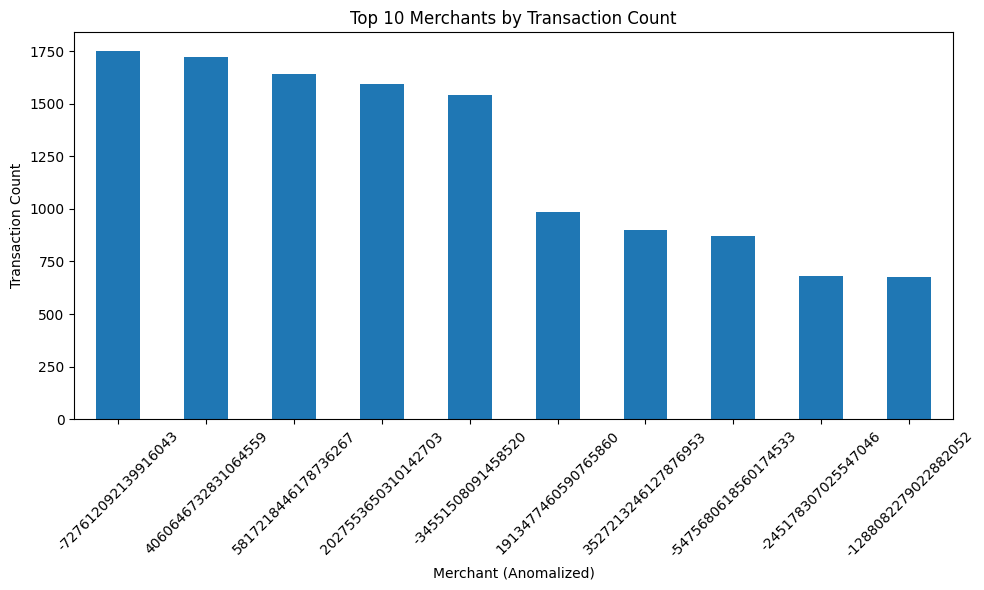

In [234]:
import matplotlib.pyplot as plt 
top_merchants = df['Merchant Name'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_merchants.plot(kind='bar')
plt.title('Top 10 Merchants by Transaction Count')
plt.xlabel('Merchant (Anomalized)')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [249]:
top_merchants_list = df['Merchant Name'].value_counts().index.tolist()
merchant_map = {m: f"Merchant_{i+1}" for i,m in enumerate(top_merchants_list)}
df['Merchant_Label'] = df['Merchant Name'].map(merchant_map)

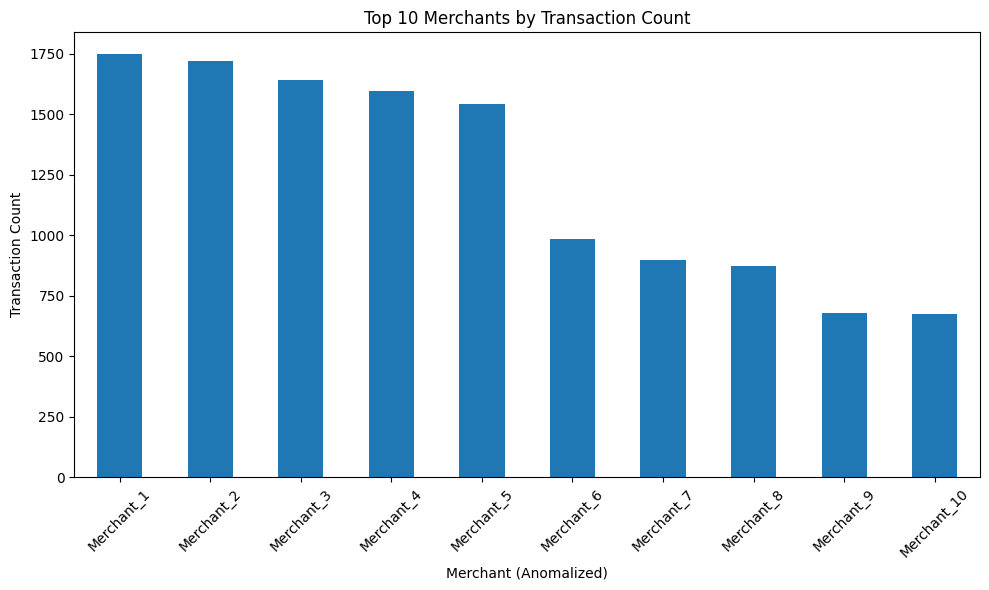

In [250]:
import matplotlib.pyplot as plt 
top_merchants = df['Merchant_Label'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_merchants.plot(kind='bar')
plt.title('Top 10 Merchants by Transaction Count')
plt.xlabel('Merchant (Anomalized)')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [251]:
fraud_rate = df.groupby('Merchant_Label')['Is Fraud?'].mean().sort_values(ascending=False)
fraud_rate_filtered = fraud_rate[df['Merchant_Label'].value_counts() > 50].head(10)
print(fraud_rate_filtered)

Merchant_Label
Merchant_33    0.057692
Merchant_31    0.017241
Merchant_24    0.010989
Merchant_9     0.001471
Merchant_6     0.001015
Merchant_7     0.000000
Merchant_2     0.000000
Merchant_17    0.000000
Merchant_19    0.000000
Merchant_15    0.000000
Name: Is Fraud?, dtype: float64


/var/folders/_8/m9hxp8392z77yh1ccdhqdqfr0000gn/T/ipykernel_45493/2568517530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Merchant_Label')['Is Fraud?'].mean().sort_values(ascending=False)


In [254]:
print(df['Is Fraud?'].value_counts(normalize=True))
print(df.corr(numeric_only=True)['Is Fraud?'].sort_values(ascending=False))

Is Fraud?
0    0.999345
1    0.000655
Name: proportion, dtype: float64
Is Fraud?      1.000000
Card           0.020987
Month          0.015866
Time           0.003627
Amount        -0.002937
Use Chip      -0.004741
Merchant_ID   -0.004861
Day           -0.005308
Year          -0.008041
MCC           -0.028570
Name: Is Fraud?, dtype: float64


In [241]:
%pip install imblearn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [255]:
# One-hot encode categorical columns before SMOTE
X_encoded = pd.get_dummies(X, drop_first=True)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       1.00      1.00      1.00      3678

    accuracy                           1.00      7322
   macro avg       1.00      1.00      1.00      7322
weighted avg       1.00      1.00      1.00      7322



In [257]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())


Cross-validated F1 scores: [0.99986341 1.         1.         1.         1.        ]
Mean F1 score: 0.9999726813276876


In [261]:
count=0
for col in X_resampled.columns:
    count+=1
    if (count >50):
        break
    print(f"{col} correlation with Is Fraud?:", X_resampled[col].corr(y_resampled))



Card correlation with Is Fraud?: 0.44659983859360797
Year correlation with Is Fraud?: -0.22163254148670192
Month correlation with Is Fraud?: 0.32519904310780307
Day correlation with Is Fraud?: -0.15062876893118424
Time correlation with Is Fraud?: 0.041668945488347715
Amount correlation with Is Fraud?: -0.1037321465940928
Use Chip correlation with Is Fraud?: -0.283944940974488
MCC correlation with Is Fraud?: -0.5343308787820065
Merchant_ID correlation with Is Fraud?: -0.13817306379844185
Merchant Name_-8992471532581037186 correlation with Is Fraud?: -0.005226583948848452
Merchant Name_-8978688709093014088 correlation with Is Fraud?: -0.024521886354905053
Merchant Name_-8826348804033622422 correlation with Is Fraud?: -0.013829374720044139
Merchant Name_-8821774855349459387 correlation with Is Fraud?: -0.00522658394884843
Merchant Name_-8818942839839908252 correlation with Is Fraud?: -0.00522658394884837
Merchant Name_-8733402887366759764 correlation with Is Fraud?: -0.00522658394884844
M

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       1.00      1.00      1.00      3678

    accuracy                           1.00      7322
   macro avg       1.00      1.00      1.00      7322
weighted avg       1.00      1.00      1.00      7322



In [263]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())


Cross-validated F1 scores: [0.99986341 1.         1.         1.         1.        ]
Mean F1 score: 0.9999726813276876


In [265]:
from sklearn.metrics import f1_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Train F1: {train_f1:.4f}")
print(f"Test F1: {test_f1:.4f}")

Train F1: 1.0000
Test F1: 1.0000


In [268]:
import pandas as pd
import numpy as np

# Example: Suppose you have a new data sample (replace values with actual ones)
# The new data must have the **same columns and order** as your training data (X_resampled)
new_data_dict = {
    "Card": [1234567890123456],
    "Year": [2024],
    "Month": [5],
    "Day": [15],
    "Time": [1430],
    "Amount": [250.75],
    "Use Chip": [1],
    "MCC": [5411],
    # Add all other required features with example values here...
}

# Convert new data to DataFrame
new_data = pd.DataFrame(new_data_dict)

# Add missing columns (from X_resampled) as 0/False
for col in X_resampled.columns:
    if col not in new_data.columns:
        # Use False for bool columns, 0 for others
        if X_resampled[col].dtype == bool:
            new_data[col] = False
        else:
            new_data[col] = 0

# One-hot encode new data in the same way as X_encoded
new_data_encoded = pd.get_dummies(new_data, drop_first=True)
# Add missing columns
for col in X_resampled.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0
# Ensure order
new_data_encoded = new_data_encoded[X_resampled.columns]
# Predict
prediction = model.predict(new_data_encoded)

/var/folders/_8/m9hxp8392z77yh1ccdhqdqfr0000gn/T/ipykernel_45493/2306204319.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = False
/var/folders/_8/m9hxp8392z77yh1ccdhqdqfr0000gn/T/ipykernel_45493/2306204319.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data[col] = False
/var/folders/_8/m9hxp8392z77yh1ccdhqdqfr0000gn/T/ipykernel_45493/2306204319.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co